# Transforming images into csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import cv2

In [2]:
def correspondingShuffle(a, b):
    """ Shuffle the numpy array so that a[i] correspond to b[i]"""
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


def implt(img, cmp=None, t=''):
    """ Show image using plt """
    plt.imshow(img, cmap=cmp)
    plt.title(t)
    plt.show()

In [3]:
def sobelDetect(channel):
    """ The Sobel Operator"""
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    # Combine x, y gradient magnitudes sqrt(x^2 + y^2)
    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255
    return sobel


def imgPreprocess(image):
    """ Preprocess image for """
    img = cv2.bilateralFilter(image, 0, 30, 30)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # @TODO Can try only revers colors on grayscale image
    # reversGray = cv2.bitwise_not(gray)
    
    edges = np.uint8(sobelDetect(gray))
    ret,th = cv2.threshold(edges, 50, 255, cv2.THRESH_TOZERO)
    return th

In [4]:
imglist0 = glob.glob('data/gapdet/0/*.jpg')
imglist1 = glob.glob('data/gapdet/1/*.jpg')

# cv2.imread(img, 0) - for loading images in grayscale
img0 = np.array([np.array(imgPreprocess(cv2.imread(img))) for img in imglist0])
img1 = np.array([np.array(imgPreprocess(cv2.imread(img))) for img in imglist1])

# 755 chars and 306 gaps images, dimension 30x60 = 1800
images = np.concatenate([img0.reshape(755,1800), img1.reshape(306, 1800)])
labels = np.concatenate([np.zeros(755), np.ones(306)])

images, labels = correspondingShuffle(images, labels)    

with open('data/gapdet/data.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for row in images:
        writer.writerow(row)
        
with open('data/gapdet/labels.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(labels)
    
print("CSV data files saved.")

CSV data files saved.


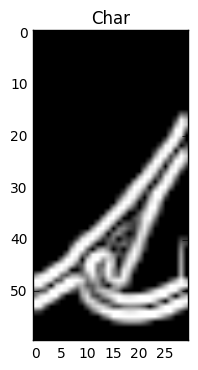

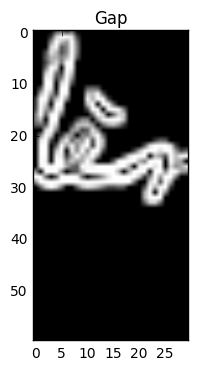

In [5]:
for i in range(len(images)):
    if labels[i] == 0:
        implt(images[i].reshape(60,30), 'gray', 'Char')
        break;
        
for i in range(len(images)):
    if labels[i] == 1:
        implt(images[i].reshape(60,30), 'gray', 'Gap')
        break;